This is the projected cooling algorithm for the IBM bootcamp on Oct. 18-19th 2019. Group members: Joey Bonitati, Ilaria Siloi, and Jacob Watkins

In [62]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
#parameters
L = 3
n_qubit = 2*L+1
Lt = 10.
nt = 40
deltat = Lt/nt
V0 = -1.

Define some useful gates 

In [58]:
def N(qc, q1, q2, alpha, beta, gamma):
    qc.rz(np.pi/2,q2)
    qc.cx(q2,q1)
    qc.rz(-np.pi/2,q1)
    qc.ry(np.pi/2- 2*alpha,q2)
    qc.cx(q1,q2)
    qc.ry(2*beta-np.pi/2,q2)
    qc.cx(q2,q1)
    qc.rz(-np.pi/2,q1)

Construct the quantum circuit

In [59]:
qr = QuantumRegister(n_qubit)
cr = ClassicalRegister(n_qubit)

qc = QuantumCircuit(qr,cr)

#initialize state
qc.x(L)
qc.barrier()

#perform time evolution
for step in range(0,nt):
        #Potential
        qc.rz(2*deltat*V0, L)
        qc.barrier()
        #Diagonal Kinetic
        qc.rz(2*deltat,np.arange(0,n_qubit))
        qc.barrier()
        #Even kinetic
        for i in range(0,n_qubit-1,2):
            N(qc,i,i+1,deltat/2,deltat/2,0)
        qc.barrier()
        #Odd kinetic
        for i in range(1,n_qubit,2):
            N(qc,i,i+1,deltat/2,deltat/2,0)
        qc.barrier()

#qc.measure(qr,cr)            
#qc.draw(output='mpl')


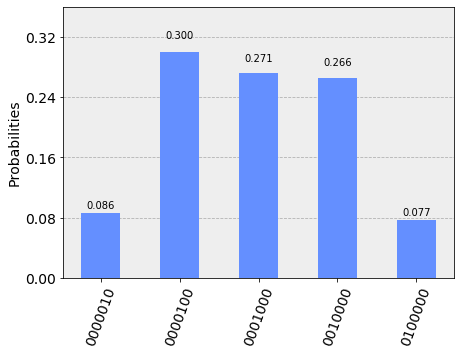

In [60]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')

job_sim = execute(qc, backend)
result_sim = job_sim.result()
counts = result_sim.get_counts()
plot_histogram(counts)

In [63]:
backend = BasicAer.get_backend('statevector_simulator')

job_sim = execute(qc, backend)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector()

quantum_state

array([0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.9997629+0.02177495j, 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j        ,
       0.       +0.j        , 0.       +0.j   